# bionet PCA dimension reduction
http://yltang.net/tutorial/dsml/14/
https://kknews.cc/zh-tw/code/zpl6l3q.html
https://zhuanlan.zhihu.com/p/43225794
https://kknews.cc/zh-tw/other/3489pvo.html
https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python

In [231]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
from mpl_toolkits.mplot3d import Axes3D
import imageio
from sklearn.decomposition import PCA
plt.style.use('ggplot')
np.set_printoptions(precision=5, suppress=True)
# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = os.path.join('/Volumes','Transcend','下載項目','實習','工研院','paper/')

In [232]:
# 讀取檔案
f_app = os.path.join(dir_data, '仁德水樣數據 整理_202000716.xlsx')
print('Path of read in data: %s' % (f_app))
df = pd.read_excel(f_app)
df.head()

Path of read in data: /Volumes/Transcend/下載項目/實習/工研院/paper/仁德水樣數據 整理_202000716.xlsx


Unnamed: 0 Unnamed: 1 Unnamed: 2           Unnamed: 3 Unnamed: 4 Influent   \
0        NaN  Fake Date        NaT                   日期         樣品        pH   
1        NaN          1 2018-11-22  2018-11-22 00:00:00        砂濾出      7.05   
2        NaN          2 2018-11-23  2018-11-23 00:00:00        砂濾出      7.08   
3        NaN          3 2018-11-30  2018-11-30 00:00:00      前砂濾出水      6.73   
4        NaN          4 2018-12-03  2018-12-04 00:00:00      前砂濾出水      6.59   

   Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 22 Unnamed: 23  \
0  導電度(us/cm)    濁度(NTU)   SS(mg/L)  COD(mg/L)  ...       NH3-N       NO2-N   
1         748       2.88          0         28  ...     7.64318     14.5622   
2         766       2.23         18         23  ...     14.9325     12.9553   
3         755        2.5         24         41  ...    0.526139     6.52701   
4         780       2.48          2         23  ...     2.64213     11.4664   

  Unnamed: 24 Unnamed: 25 Unnamed: 26 Unnamed: 27 Unnamed: 28 Unnamed: 29  \
0       NO3-N         TKN         NaN       氨氮去除率      COD去除率       濁度去除率   
1     23.6149         NaN         NaN      22.673     7.14286     20.1389   
2     26.0611         NaN         NaN   -0.796178    -13.0435    -42.1525   
3     41.8618         NaN         NaN     93.7669     36.5854        43.2   
4     31.2484         NaN         NaN     72.1351    -69.5652    -12.0968   

  Unnamed: 30 Unnamed: 31  
0      TOC去除率       SS去除率  
1    -9.07591           0  
2     -9.9734         100  
3     12.7778     91.6667  
4    -20.9459         100  

[5 rows x 32 columns]

In [233]:
influent = df.iloc[0:64,5:15]
new_header = influent.iloc[0] 
influent = df.iloc[1:64,5:15] 
influent.columns = new_header
#influent.fillna(influent.mean(),inplace=True)
influent

0     pH  導電度(us/cm)  濁度(NTU)  SS(mg/L)  COD(mg/L)  TOC(mg/L)      NH3-N  \
1   7.05       748.0     2.88         0         28       6.06   9.884233   
2   7.08       766.0     2.23        18         23       7.52  14.814554   
3   6.73       755.0     2.50        24         41       9.00   8.441106   
4   6.59       780.0     2.48         2         23       4.44   9.481946   
5   6.48       764.0     2.96         1         39       6.38   5.501588   
..   ...         ...      ...       ...        ...        ...        ...   
59  6.53       652.0     0.92         0         57      22.25   0.100000   
60  6.73       667.0     1.12         4         52      21.35   0.100000   
61  6.66       700.0     2.32        12         42      16.75   0.100000   
62  6.94       491.0     1.92         0          9       5.20   0.172948   
63  7.38       499.0     0.94         0         12       5.10   0.100000   

0       NO2-N      NO3-N       TKN  
1   13.658350  25.214333  4.884833  
2   12.051485  24.649833  4.884833  
3    9.702319  28.246142  4.884833  
4    8.732087  23.806255  4.884833  
5   11.995594  26.089625  4.884833  
..        ...        ...       ...  
59   0.100000   8.520257  4.884833  
60   0.100000  10.525023  4.884833  
61   4.558580  20.671063  4.884833  
62   1.835272  17.453140  4.884833  
63   0.100000  29.615797  4.884833  

[63 rows x 10 columns]

In [234]:
effluent = df.iloc[1:64,16:26] 
effluent.columns = new_header
#effluent.fillna(effluent.mean(),inplace=True)
effluent

0     pH  導電度(us/cm)  濁度(NTU)  SS(mg/L)  COD(mg/L)  TOC(mg/L)      NH3-N  \
1   6.88         719     2.30         0         26       6.61   7.643178   
2   7.20         765     3.17         0         26       8.27  14.932505   
3   6.59         705     1.42         2         26       7.85   0.526139   
4   6.28         739     2.78         0         39       5.37   2.642135   
5   6.24         732     2.78         0         35       4.63   0.050000   
..   ...         ...      ...       ...        ...        ...        ...   
59  7.21         646     1.24         7         55      21.30   0.100000   
60  7.45         668     0.95         0         48      21.10   0.100000   
61  7.49         691     0.70         4         40      16.65   0.100000   
62  7.69         474     1.31         6         10       5.15   1.037688   
63  7.87         497     0.96         2         12       5.00   0.100000   

0       NO2-N      NO3-N  TKN  
1   14.562211  23.614917  1.4  
2   12.955347  26.061083  1.4  
3    6.527014  41.861798  1.4  
4   11.466377  31.248352  1.4  
5   12.392507  29.810674  1.4  
..        ...        ...  ...  
59   0.100000   8.889556  1.4  
60   0.100000  10.472266  1.4  
61   1.746469  27.106908  1.4  
62   3.315331  23.616280  1.4  
63   3.521003  29.043116  1.4  

[63 rows x 10 columns]

In [235]:
# 取出幾項變數並檢驗其相關性
influent_corrs = influent.corr()
influent_corrs

0                 pH  導電度(us/cm)   濁度(NTU)  SS(mg/L)  COD(mg/L)  TOC(mg/L)  \
0                                                                            
pH          1.000000   -0.261353 -0.235876  0.021870   0.034822   0.155829   
導電度(us/cm) -0.261353    1.000000  0.332450  0.093986   0.008605  -0.078187   
濁度(NTU)    -0.235876    0.332450  1.000000 -0.052411   0.071030  -0.360800   
SS(mg/L)    0.021870    0.093986 -0.052411  1.000000  -0.025287   0.010678   
COD(mg/L)   0.034822    0.008605  0.071030 -0.025287   1.000000   0.693798   
TOC(mg/L)   0.155829   -0.078187 -0.360800  0.010678   0.693798   1.000000   
NH3-N      -0.234549    0.344270  0.665659  0.062939  -0.181884  -0.448079   
NO2-N      -0.395549    0.283786  0.605385 -0.005416  -0.050553  -0.451352   
NO3-N       0.092828   -0.393166 -0.313051  0.114427  -0.226863  -0.108983   
TKN         0.087262    0.000850 -0.124193  0.137406  -0.007724  -0.093019   

0              NH3-N     NO2-N     NO3-N       TKN  
0                                                   
pH         -0.234549 -0.395549  0.092828  0.087262  
導電度(us/cm)  0.344270  0.283786 -0.393166  0.000850  
濁度(NTU)     0.665659  0.605385 -0.313051 -0.124193  
SS(mg/L)    0.062939 -0.005416  0.114427  0.137406  
COD(mg/L)  -0.181884 -0.050553 -0.226863 -0.007724  
TOC(mg/L)  -0.448079 -0.451352 -0.108983 -0.093019  
NH3-N       1.000000  0.543719 -0.271499  0.116640  
NO2-N       0.543719  1.000000 -0.180661 -0.042544  
NO3-N      -0.271499 -0.180661  1.000000 -0.055710  
TKN         0.116640 -0.042544 -0.055710  1.000000

In [236]:
effluent_corrs = effluent.corr()
effluent_corrs

0                 pH  導電度(us/cm)   濁度(NTU)      SS(mg/L)  COD(mg/L)  \
0                                                                     
pH          1.000000   -0.265252 -0.225850 -1.148034e-01   0.276232   
導電度(us/cm) -0.265252    1.000000  0.246511 -4.792388e-02   0.324197   
濁度(NTU)    -0.225850    0.246511  1.000000  1.195427e-01   0.208284   
SS(mg/L)   -0.114803   -0.047924  0.119543  1.000000e+00  -0.107491   
COD(mg/L)   0.276232    0.324197  0.208284 -1.074913e-01   1.000000   
TOC(mg/L)   0.468986    0.207889 -0.045082 -1.705088e-02   0.745638   
NH3-N      -0.085934    0.240196  0.294725 -7.646393e-02   0.118171   
NO2-N      -0.480499    0.118187  0.260111 -5.518294e-02  -0.038689   
NO3-N      -0.288446   -0.023646 -0.202193  1.051965e-01  -0.444892   
TKN         0.086984    0.063366  0.098395  7.212616e-20   0.059065   

0           TOC(mg/L)     NH3-N     NO2-N     NO3-N           TKN  
0                                                                  
pH           0.468986 -0.085934 -0.480499 -0.288446  8.698386e-02  
導電度(us/cm)   0.207889  0.240196  0.118187 -0.023646  6.336568e-02  
濁度(NTU)     -0.045082  0.294725  0.260111 -0.202193  9.839529e-02  
SS(mg/L)    -0.017051 -0.076464 -0.055183  0.105197  7.212616e-20  
COD(mg/L)    0.745638  0.118171 -0.038689 -0.444892  5.906504e-02  
TOC(mg/L)    1.000000 -0.167228 -0.454509 -0.297978  8.500475e-02  
NH3-N       -0.167228  1.000000  0.555333 -0.406754  2.842633e-01  
NO2-N       -0.454509  0.555333  1.000000 -0.250182  9.082979e-03  
NO3-N       -0.297978 -0.406754 -0.250182  1.000000 -9.186082e-02  
TKN          0.085005  0.284263  0.009083 -0.091861  1.000000e+00

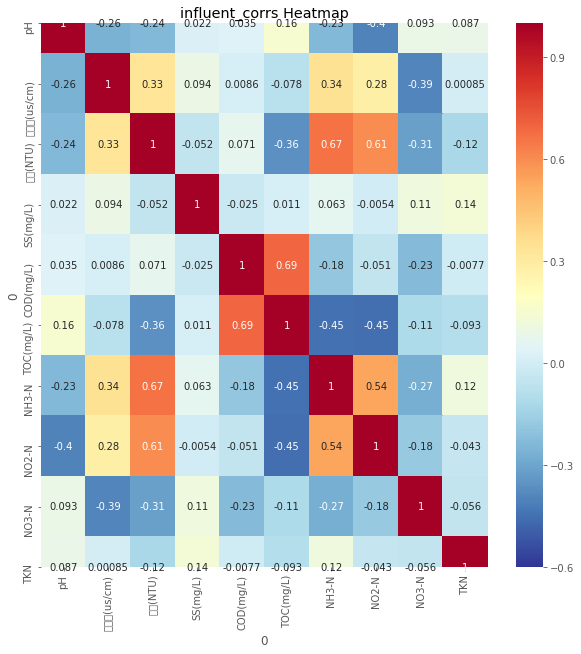

In [237]:
plt.figure(figsize = (10, 10))
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(influent_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.6, annot = True, vmax = 1.0)
plt.title('influent_corrs Heatmap');

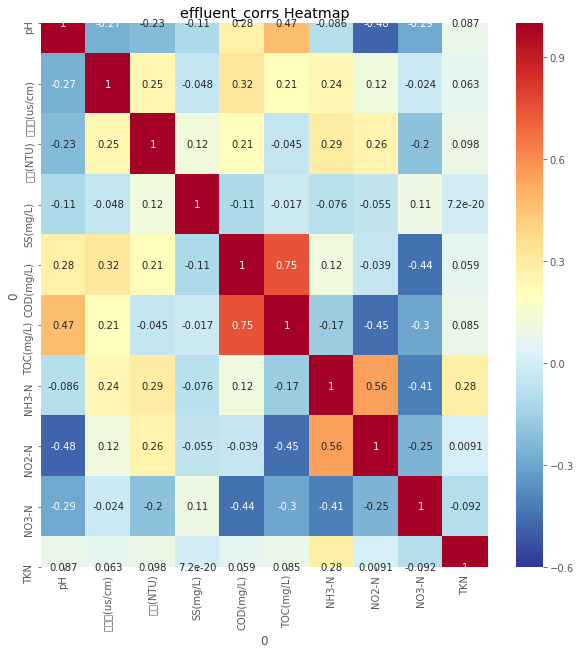

In [238]:
plt.figure(figsize = (10, 10))
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(effluent_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.6, annot = True, vmax = 1.0)
plt.title('effluent_corrs Heatmap');

In [239]:
#influent_drop=influent.drop(columns=['NH3-N','濁度(NTU)'])
#effluent_drop=effluent.drop(columns=['pH','COD(mg/L)','NO2-N'])

In [240]:
#from sklearn.decomposition import PCA
pca=PCA(n_components=4)
influent_trans = pca.fit_transform(influent)
influent_trans

array([[ 101.17573,   -3.79187,    8.16006,   -3.16937],
       [ 119.2521 ,   -9.83978,    4.49433,   14.39623],
       [ 108.17099,    3.23399,  -10.45511,   16.145  ],
       [ 133.17618,   -7.82541,    9.9614 ,   -1.20753],
       [ 117.13091,    4.95793,    0.72288,   -4.36245],
       [ 116.10387,   -0.79127,    0.01663,   -2.08127],
       [ 109.13933,   -0.40068,   -4.15266,    7.29663],
       [ 116.13668,    3.39353,   -2.62897,    1.93651],
       [ 125.16173,   -3.1673 ,    5.61764,   -3.27603],
       [ 109.10111,  -12.45198,    8.41152,   -4.40504],
       [ 136.1212 ,   -4.56572,    3.41003,   -2.115  ],
       [ 149.17035,    0.11942,    5.4723 ,   -3.46425],
       [ 137.19324,   -1.68916,    0.79221,    7.29409],
       [ 137.19188,    1.57008,    3.5695 ,    0.49588],
       [ 151.23204,   -1.7382 ,    9.37922,   -0.64948],
       [ 100.25255,    0.82218,   10.12896,   -0.79034],
       [ 138.29317,   -5.30023,    6.18528,   13.79991],
       [ 117.23245,    1.88333,

In [241]:
#第一個是explained_variance_，它代表降維後的各主成分的方差值。方差值越大，則說明越是重要的主成分。
#第二個是explained_variance_ratio_，它代表降維後的各主成分的方差值佔總方差值的比例，這個比例越大，則越是重要的主成分。
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[92133.94753   136.28942    87.11682    61.09935]
[0.9964  0.00147 0.00094 0.00066]


In [214]:
#X=pca.inverse_transform(influent_fit)
#X

In [215]:
influent_trans_df=pd.DataFrame(influent_trans, columns=['PCA%i' % i for i in range(4)], index=influent.index)

<Figure size 1000x1000 with 0 Axes>

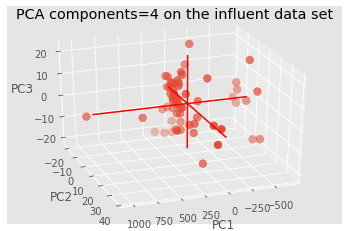

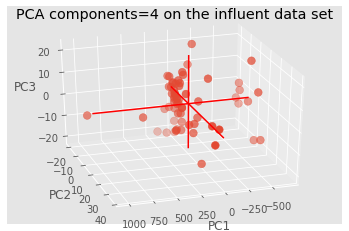

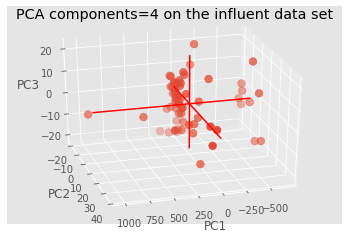

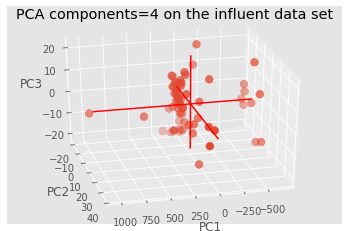

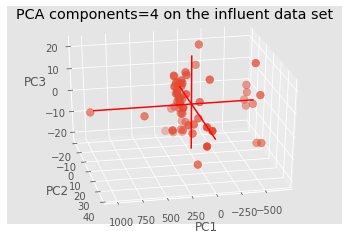

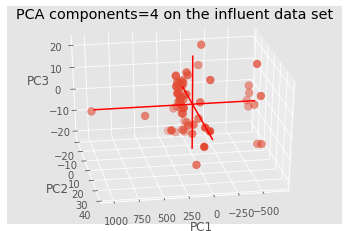

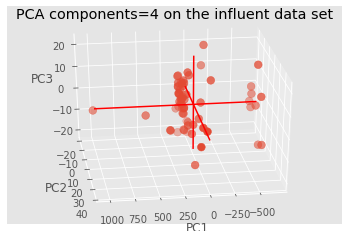

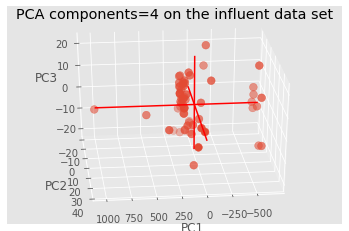

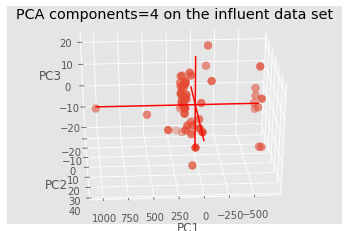

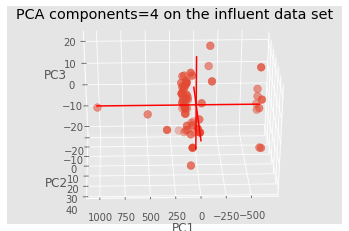

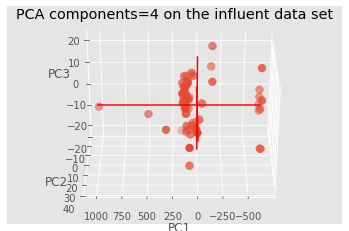

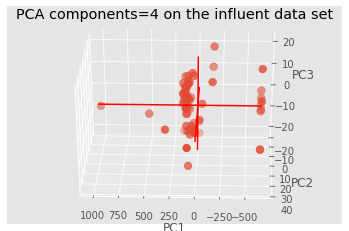

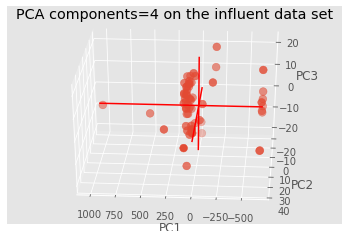

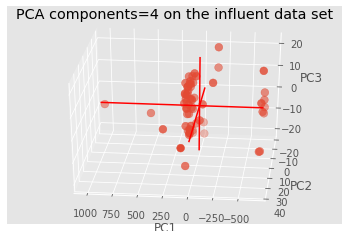

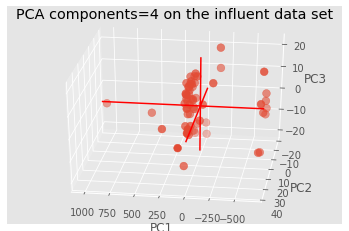

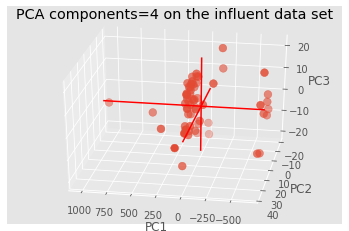

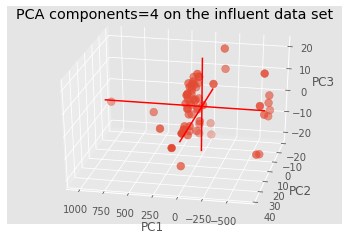

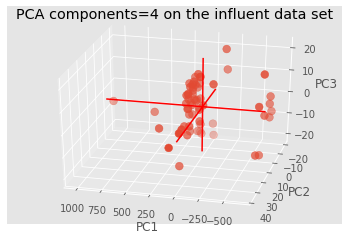

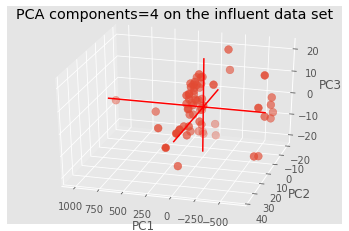

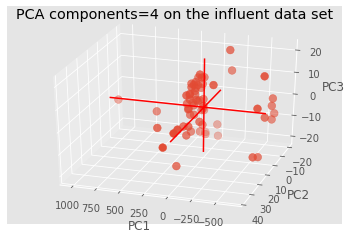

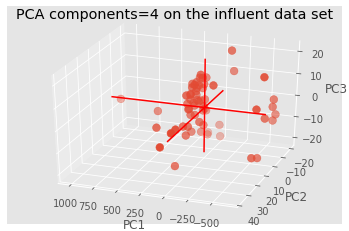

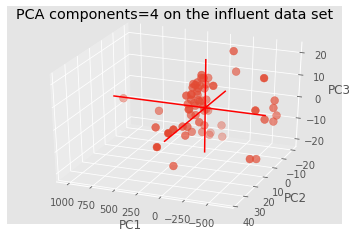

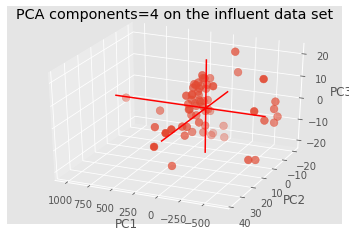

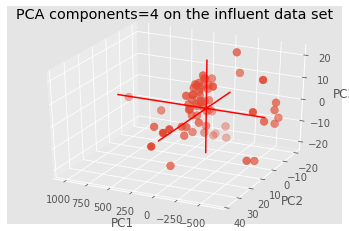

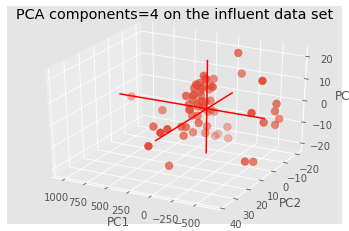

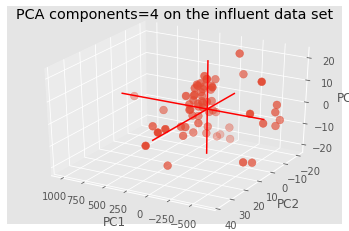

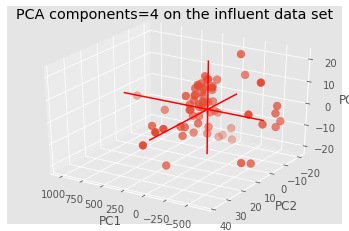

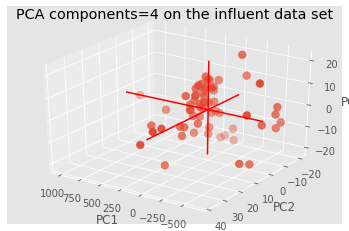

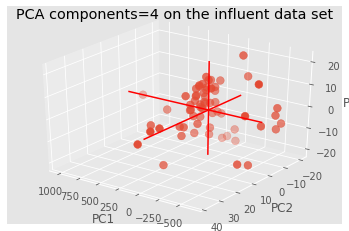

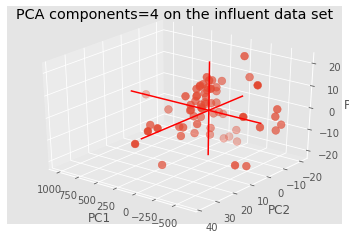

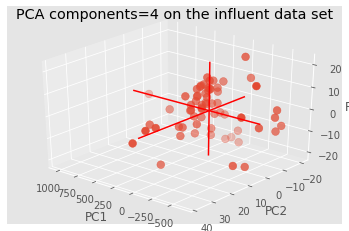

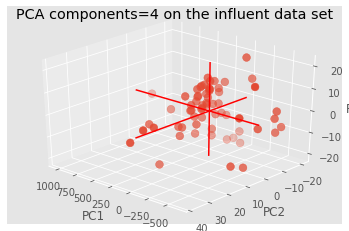

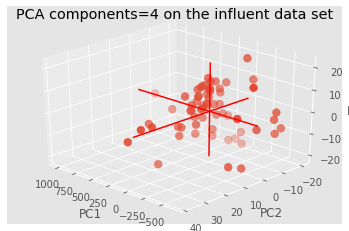

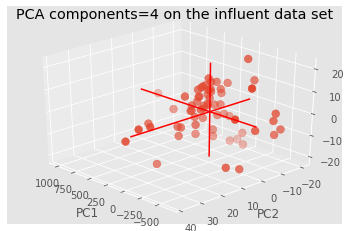

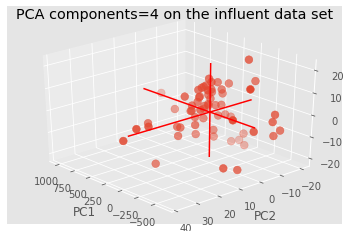

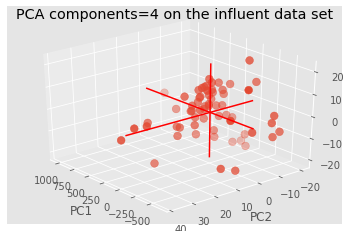

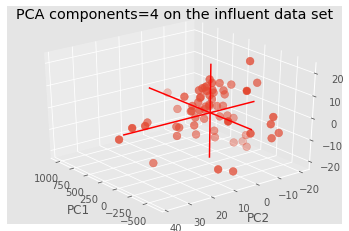

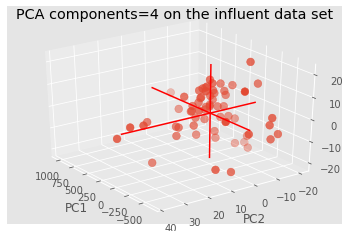

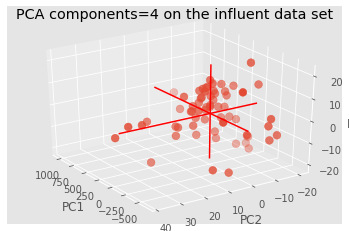

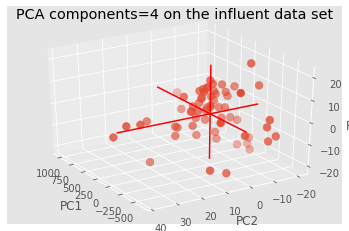

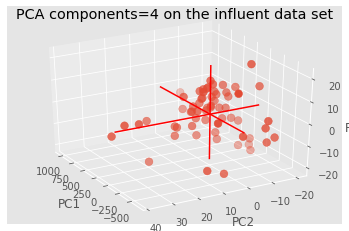

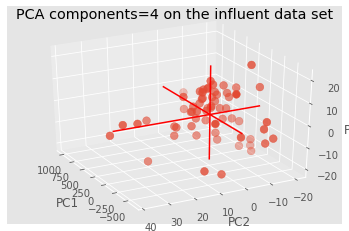

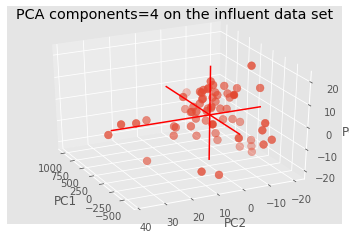

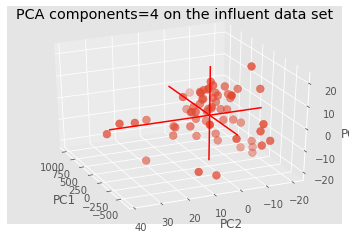

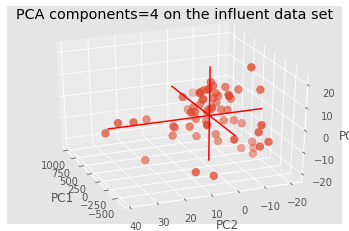

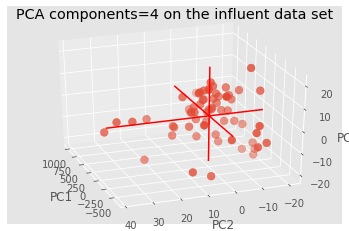

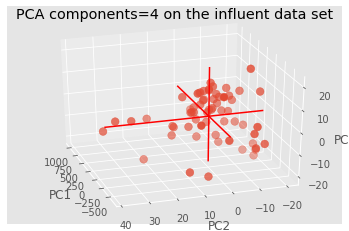

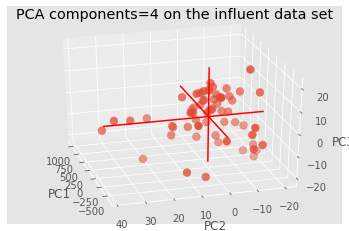

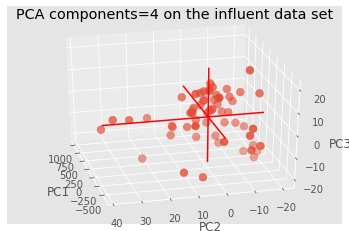

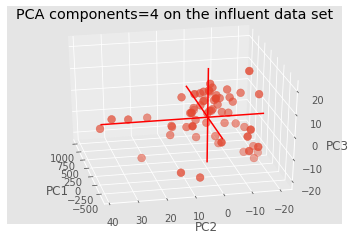

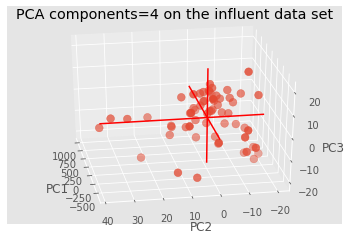

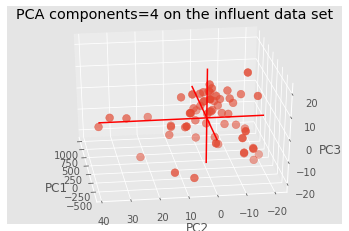

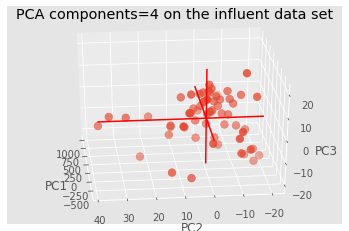

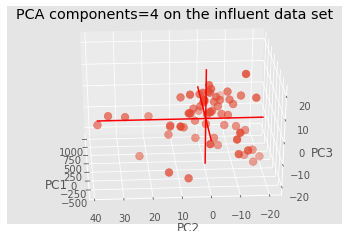

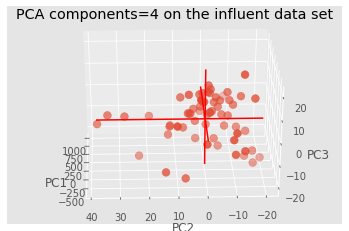

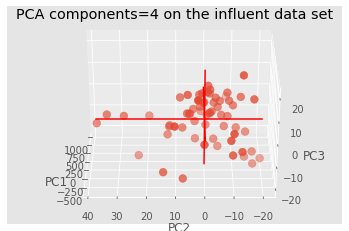

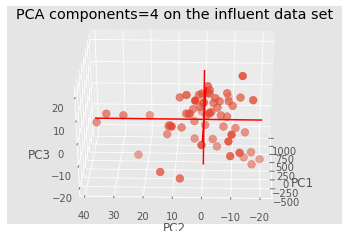

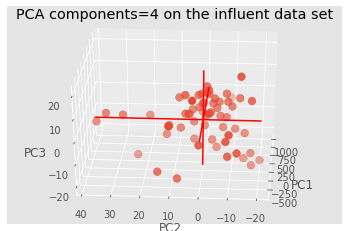

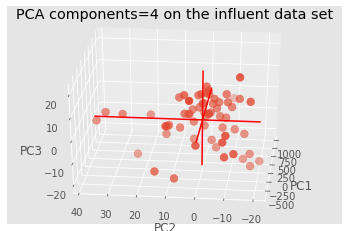

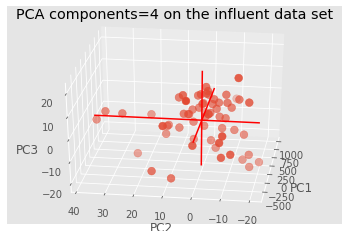

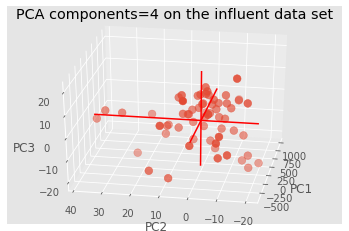

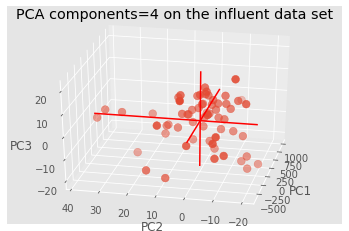

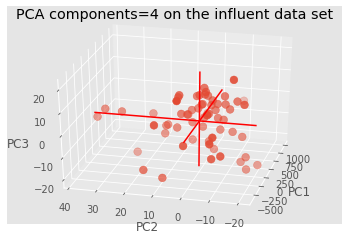

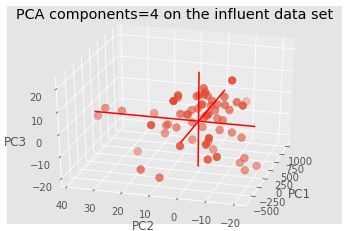

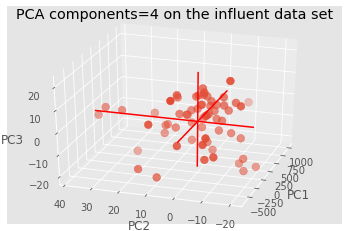

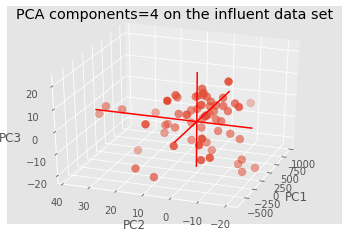

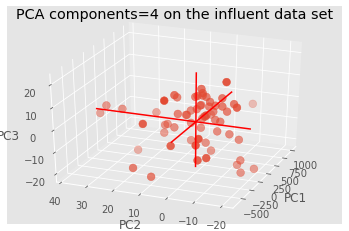

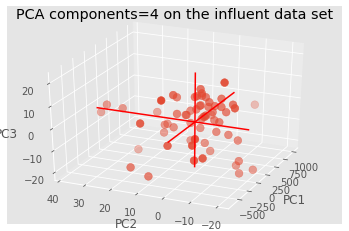

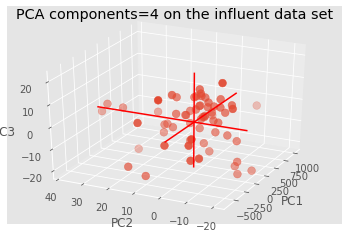

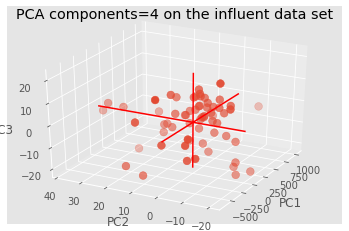

In [216]:
#df['species']=pd.Categorical(df['species']) 
##Keep the 'specie' column appart + make it numeric for coloring
#influent['pH']=pd.Categorical(influent['pH'])
#my_color=influent['pH'].cat.codes

plt.figure(figsize=(10, 10), dpi=100)

# 20 plots, for 20 different angles
for angle in range(70,210,2): 
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(influent_trans_df['PCA0'], influent_trans_df['PCA1'], influent_trans_df['PCA2'], c=None, cmap="Set2_r", s=60)
 
    # make simple, bare axis lines through space:
    xAxisLine = ((min(influent_trans_df['PCA0']), max(influent_trans_df['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(influent_trans_df['PCA1']), max(influent_trans_df['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(influent_trans_df['PCA2']), max(influent_trans_df['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

    ax.view_init(30,angle)
    # label the axes
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA components=4 on the influent data set")
    filename= dir_data+'/PCA/'+'influent_PCA_com4_angle'+str(angle)+'.png' 
    plt.savefig(filename, dpi=100)
    #plt.show()

def make_gif(input_folder, save_filepath):
    episode_frames = []
    time_per_step = 0.25
    for root, _, files in os.walk(input_folder):
        file_paths = [os.path.join(root, file) for file in files]
        #sorted by modified time
        file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))
        episode_frames = [imageio.imread(file_path) 
                          for file_path in file_paths if file_path.endswith('.png')]
    episode_frames = np.array(episode_frames)
    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)
        
make_gif('/Volumes/Transcend/下載項目/實習/工研院/paper/PCA/', '/Volumes/Transcend/下載項目/實習/工研院/paper/PCA/influent_PCA_com4.gif')



In [217]:
effluent_trans = pca.fit_transform(effluent)
effluent_trans

array([[   9.93977,   -9.57257,    7.77236,  -13.8999 ],
       [  55.98147,   -8.82417,    5.73201,  -14.47705],
       [  -4.23046,   -6.10906,   -7.40131,   -0.44182],
       [  30.264  ,   -9.30793,    7.26698,    0.48482],
       [  23.11041,   -9.25312,    6.09542,   -2.86426],
       [  43.801  ,   -0.63841,    3.3641 ,   -9.2097 ],
       [   5.9822 ,   -2.95283,    1.8323 ,    0.00662],
       [  23.9346 ,    6.79443,    6.62252,   -2.94152],
       [   6.63684,   -7.77204,   -9.34053,   -4.26913],
       [  13.5699 ,   -7.37593,  -12.32081,   -3.23878],
       [  35.82097,   -8.25042,   -1.49568,   -6.41315],
       [  32.95361,   -8.5815 ,    1.18021,   -3.96927],
       [  63.92551,    1.15439,    7.73617,   -9.07112],
       [  -0.6479 ,    9.51998,  -12.18036,   -3.13924],
       [  78.04737,   -8.61769,    6.67264,   -9.60905],
       [   9.51817,   -3.67517,   -9.57107,   -5.63246],
       [   4.63673,   -7.95622,   -8.08902,   -5.02592],
       [  -5.30536,   -8.43722,

In [218]:
effluent_trans_df=pd.DataFrame(effluent_trans, columns=['PCA%i' % i for i in range(4)], index=effluent.index)

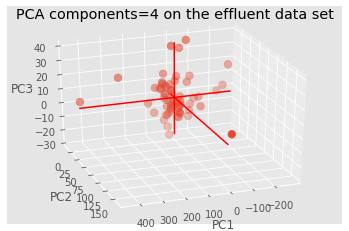

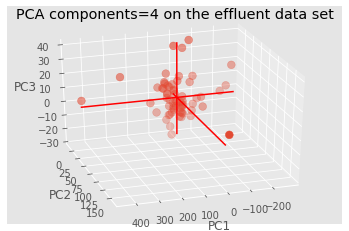

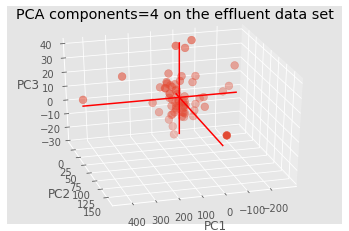

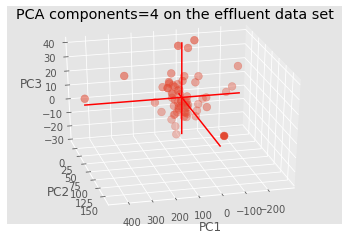

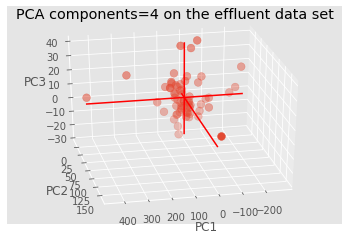

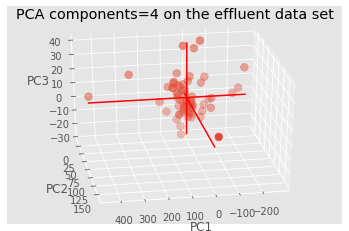

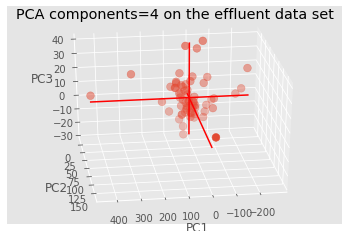

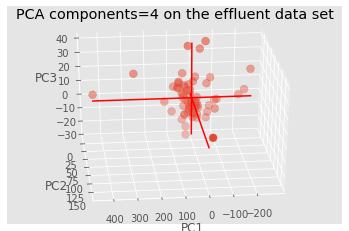

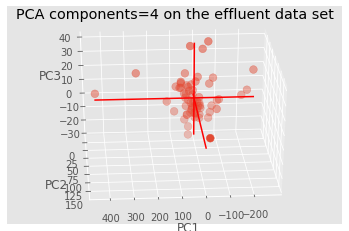

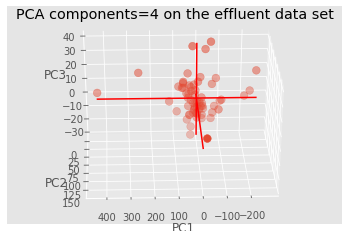

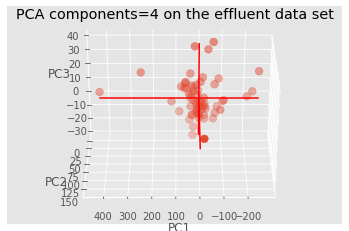

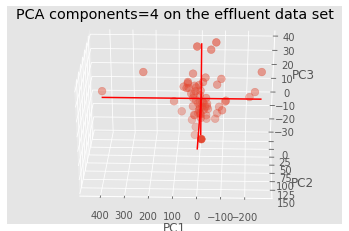

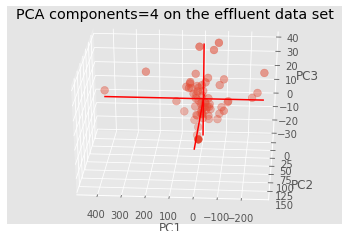

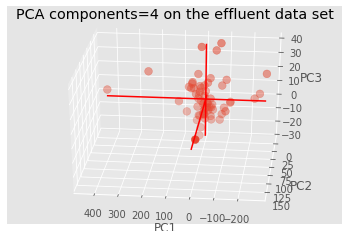

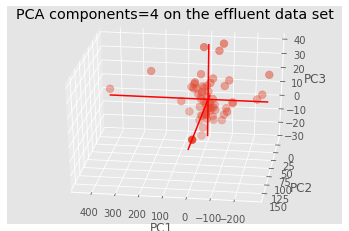

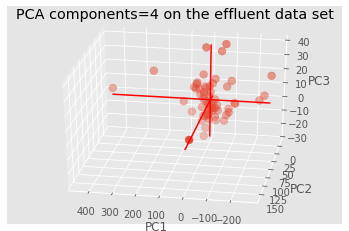

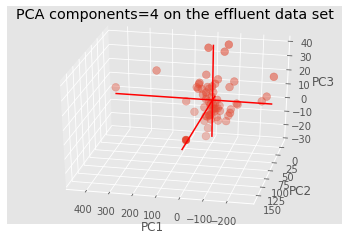

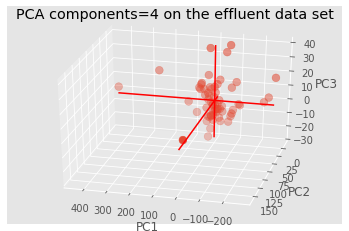

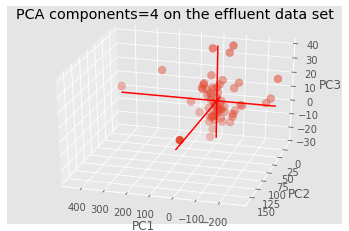

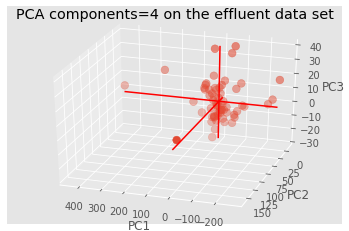

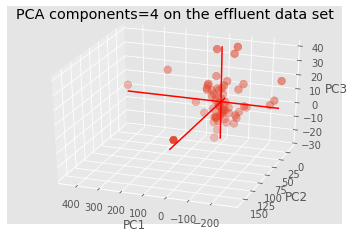

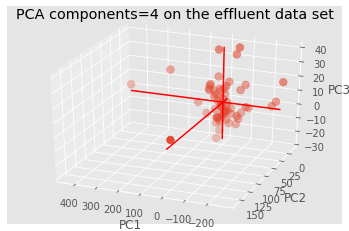

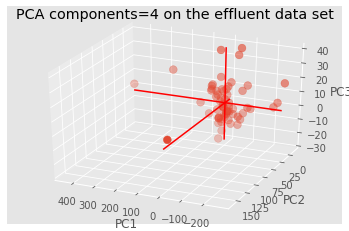

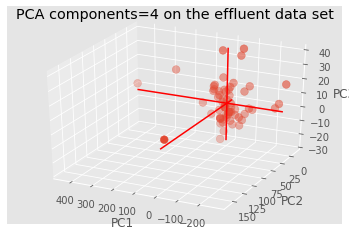

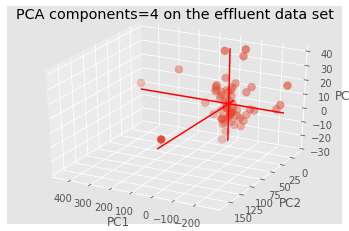

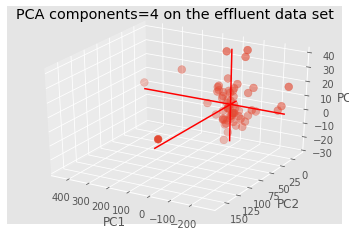

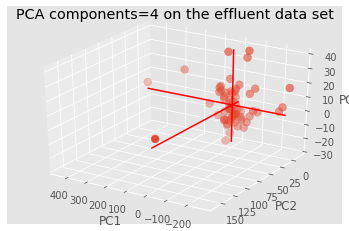

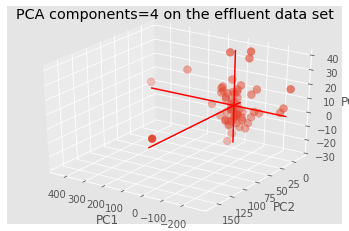

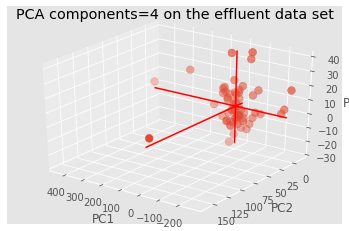

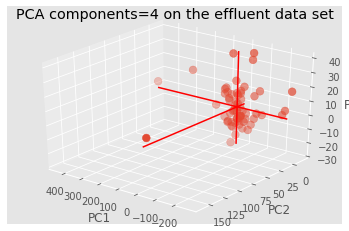

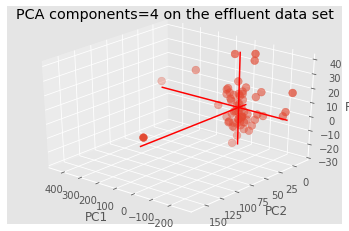

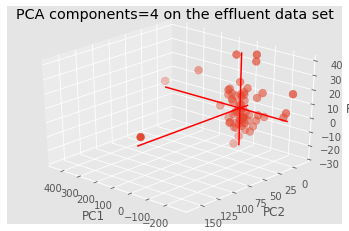

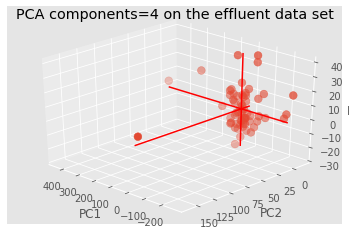

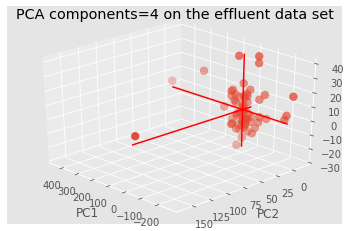

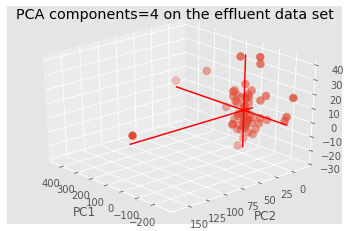

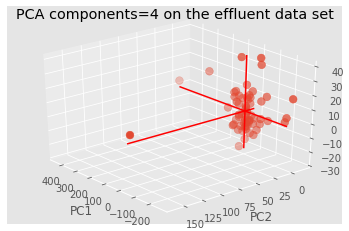

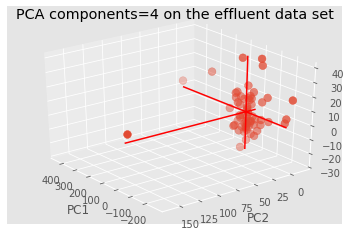

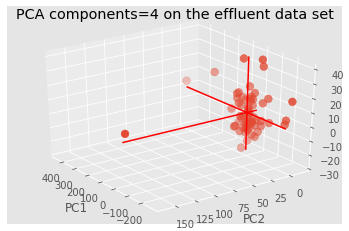

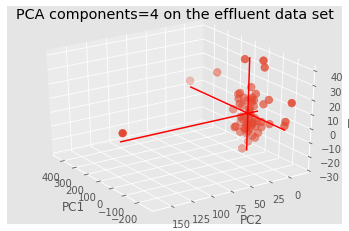

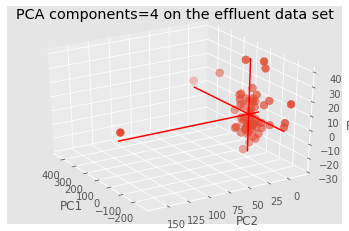

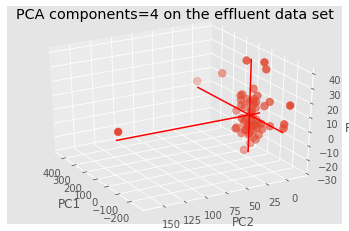

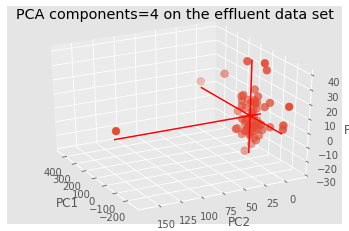

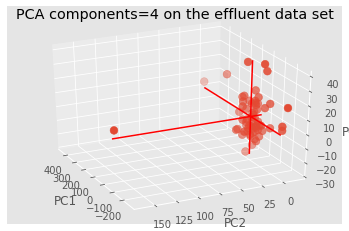

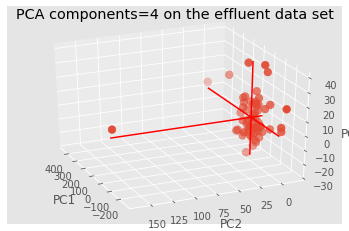

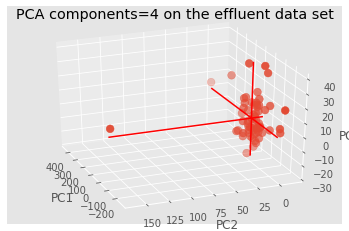

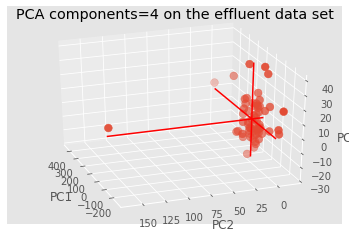

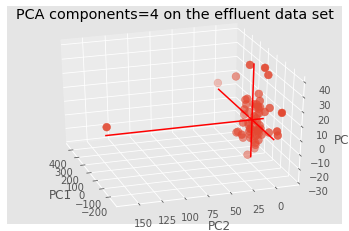

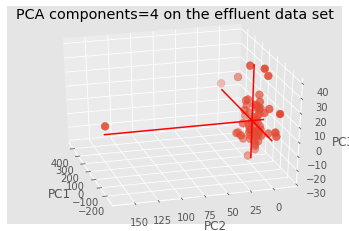

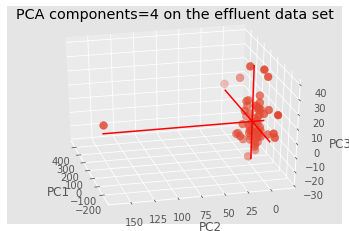

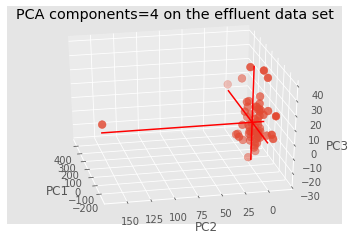

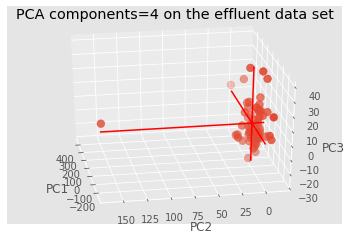

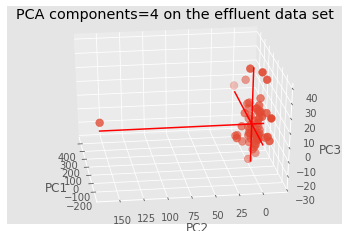

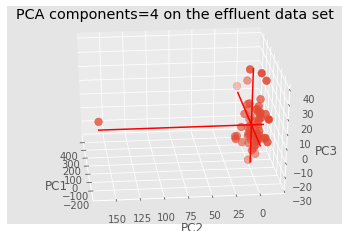

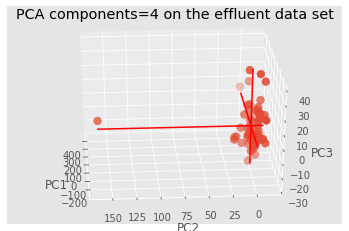

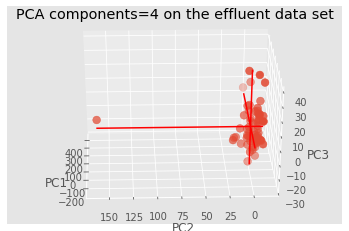

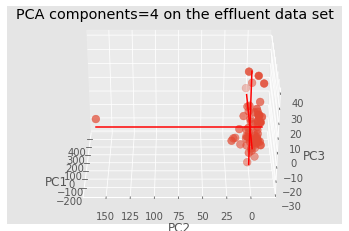

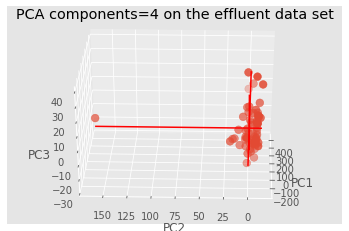

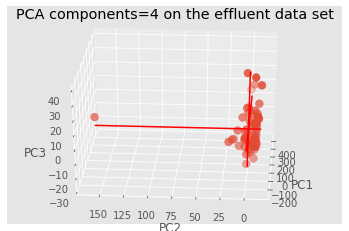

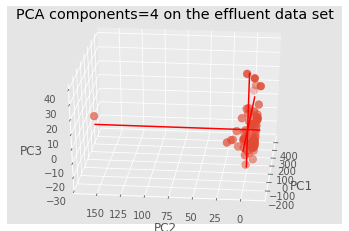

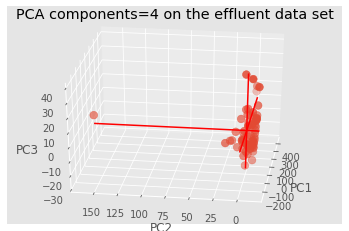

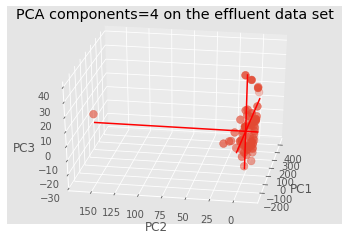

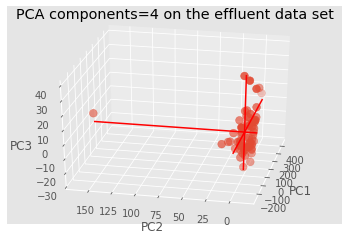

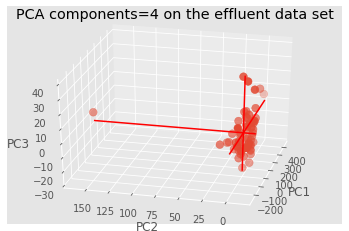

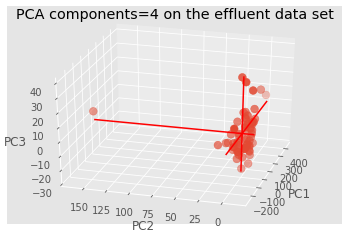

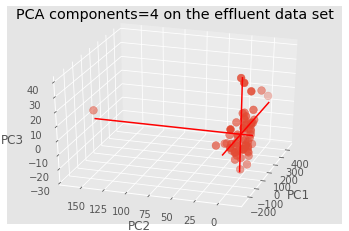

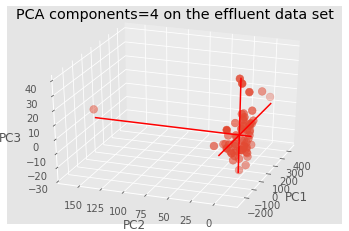

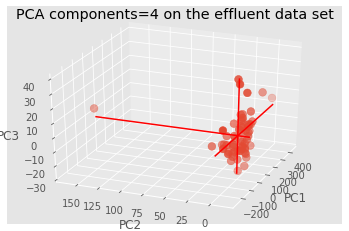

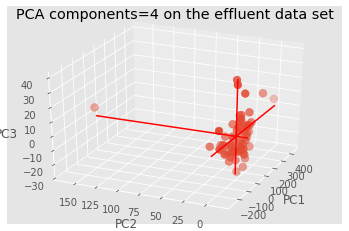

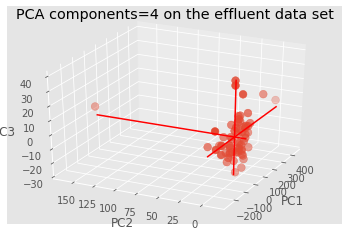

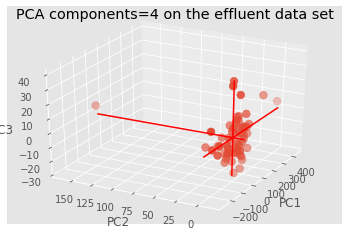

In [219]:
# 20 plots, for 20 different angles
for angle in range(70,210,2): 
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(effluent_trans_df['PCA0'], effluent_trans_df['PCA1'], effluent_trans_df['PCA2'], c=None, cmap="Set2_r", s=60)
 
    # make simple, bare axis lines through space:
    xAxisLine = ((min(effluent_trans_df['PCA0']), max(effluent_trans_df['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(effluent_trans_df['PCA1']), max(effluent_trans_df['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(effluent_trans_df['PCA2']), max(effluent_trans_df['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

    ax.view_init(30,angle)
    # label the axes
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA components=4 on the effluent data set")
    filename= dir_data+'/PCA/'+'effluent_PCA_com4_angle'+str(angle)+'.png' 
    plt.savefig(filename, dpi=100)
    #plt.show()

def make_gif(input_folder, save_filepath):
    episode_frames = []
    time_per_step = 0.25
    for root, _, files in os.walk(input_folder):
        file_paths = [os.path.join(root, file) for file in files]
        #sorted by modified time
        file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))
        episode_frames = [imageio.imread(file_path) 
                          for file_path in file_paths if file_path.endswith('.png')]
    episode_frames = np.array(episode_frames)
    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)
        
make_gif('/Volumes/Transcend/下載項目/實習/工研院/paper/PCA/', '/Volumes/Transcend/下載項目/實習/工研院/paper/PCA/effluent_PCA_com4.gif')
